In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Energy_consumption_dataset.csv'
data = pd.read_csv(file_path)
data.head(10)

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732
5,1,5,Saturday,Yes,29.576037,36.824263,1871.709180,6,Off,Off,17.626690,84.321885
6,1,6,Saturday,Yes,25.131167,35.709622,1607.001228,6,On,Off,24.264702,76.165791
7,1,7,Saturday,Yes,23.182844,31.679920,1633.955330,8,Off,Off,27.517099,74.131906
8,1,8,Saturday,No,25.391999,46.399364,1240.309224,6,On,Off,2.307595,78.206236
9,1,9,Saturday,No,22.212549,32.418464,1705.420336,1,On,Off,29.140071,77.992214


In [5]:
# Display basic information about the dataset
print("Dataset shape: ",data.shape)

Dataset shape:  (5000, 12)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [8]:
#check for missing values
data.isnull().sum()

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64

In [9]:
#statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,5000.0,6.251200,3.588687,1.000000,3.000000,6.000000,9.000000,12.000000
Hour,5000.0,11.556000,6.888306,0.000000,6.000000,11.000000,18.000000,23.000000
Temperature,5000.0,24.946823,3.041678,20.007565,22.453790,24.831846,27.427281,29.998671
Humidity,5000.0,45.478146,8.972690,30.015975,38.111104,45.793124,52.696651,59.969085
SquareFootage,5000.0,1507.403201,293.147209,1000.512661,1253.906598,1513.581105,1754.846457,1999.982252
Occupancy,5000.0,4.576000,2.906185,0.000000,2.000000,5.000000,7.000000,9.000000
RenewableEnergy,5000.0,15.201195,9.157038,0.006642,7.477928,15.343830,22.889997,29.965327
EnergyConsumption,5000.0,76.794919,9.231573,53.263278,70.419588,76.696267,83.246274,99.201120


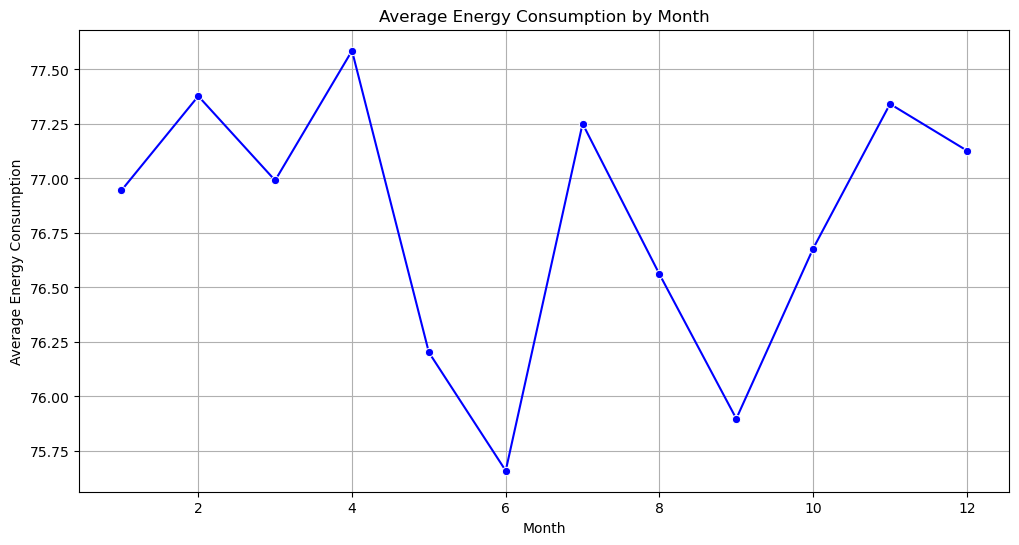

In [10]:
#Energy consumption by month
if "Month" in data.columns and 'EnergyConsumption' in data.columns:
    monthly_consumption = data.groupby('Month')['EnergyConsumption'].mean()
    #plotting average energy consumption
    plt.figure(figsize=(12,6))
    sns.lineplot(x=monthly_consumption.index,y=monthly_consumption.values,marker='o',color='blue')
    plt.title('Average Energy Consumption by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Energy Consumption')
    plt.grid()
    plt.show()

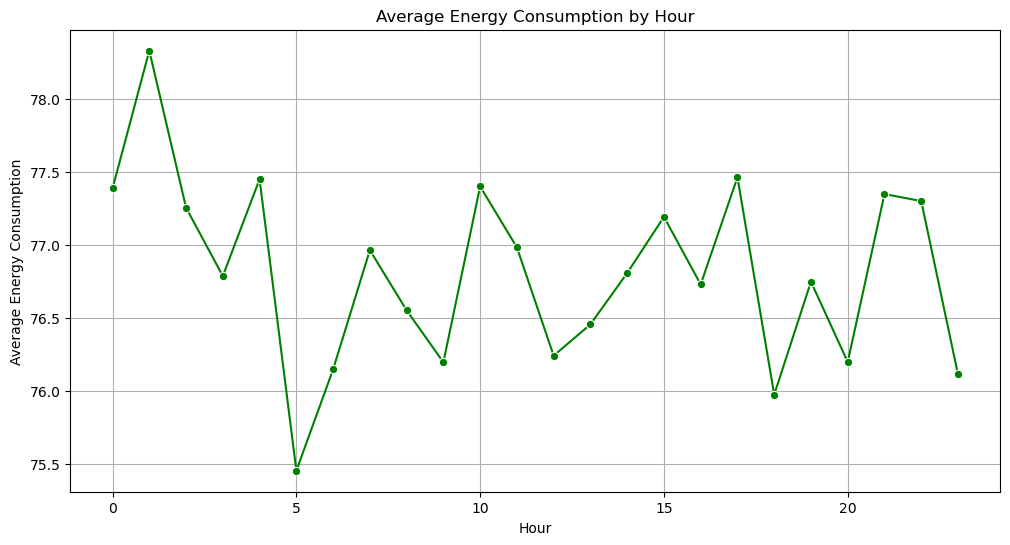

In [11]:
# Assuming 'Hour' and 'Energy_Consumption' columns exist
if 'Hour' in data.columns and 'EnergyConsumption' in data.columns:
    hourly_consumption = data.groupby('Hour')['EnergyConsumption'].mean()

    # Plot average energy consumption by hour
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=hourly_consumption.index, y=hourly_consumption.values, marker='o', color='green')
    plt.title('Average Energy Consumption by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Average Energy Consumption')
    plt.grid()
    plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_25848\836632261.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_consumption.index, y=day_of_week_consumption.values, palette='viridis')


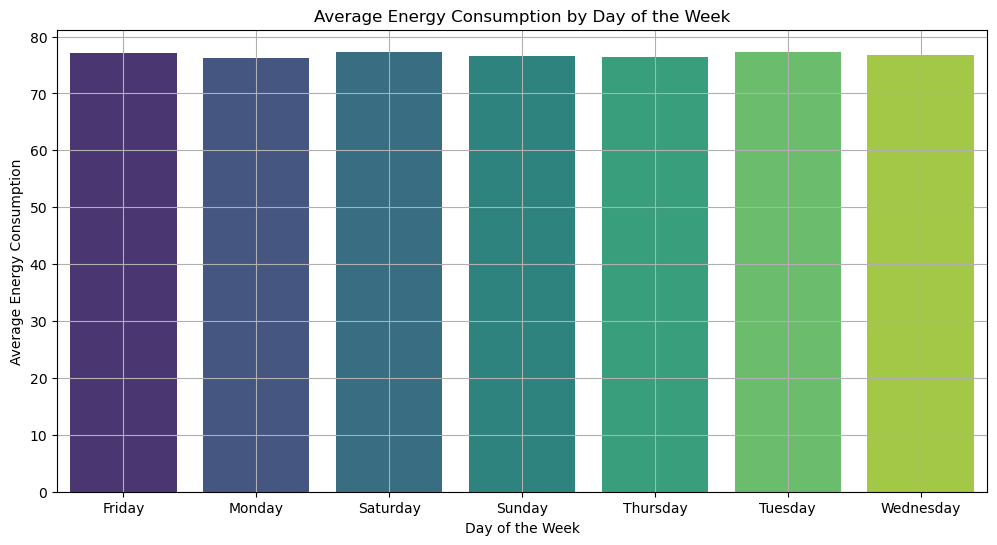

In [12]:
# Assuming 'Day_of_Week' and 'Energy_Consumption' columns exist
if 'DayOfWeek' in data.columns and 'EnergyConsumption' in data.columns:
    day_of_week_consumption = data.groupby('DayOfWeek')['EnergyConsumption'].mean()

    # Plot average energy consumption by day of the week
    plt.figure(figsize=(12, 6))
    sns.barplot(x=day_of_week_consumption.index, y=day_of_week_consumption.values, palette='viridis')
    plt.title('Average Energy Consumption by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Energy Consumption')
    plt.grid()
    plt.show()

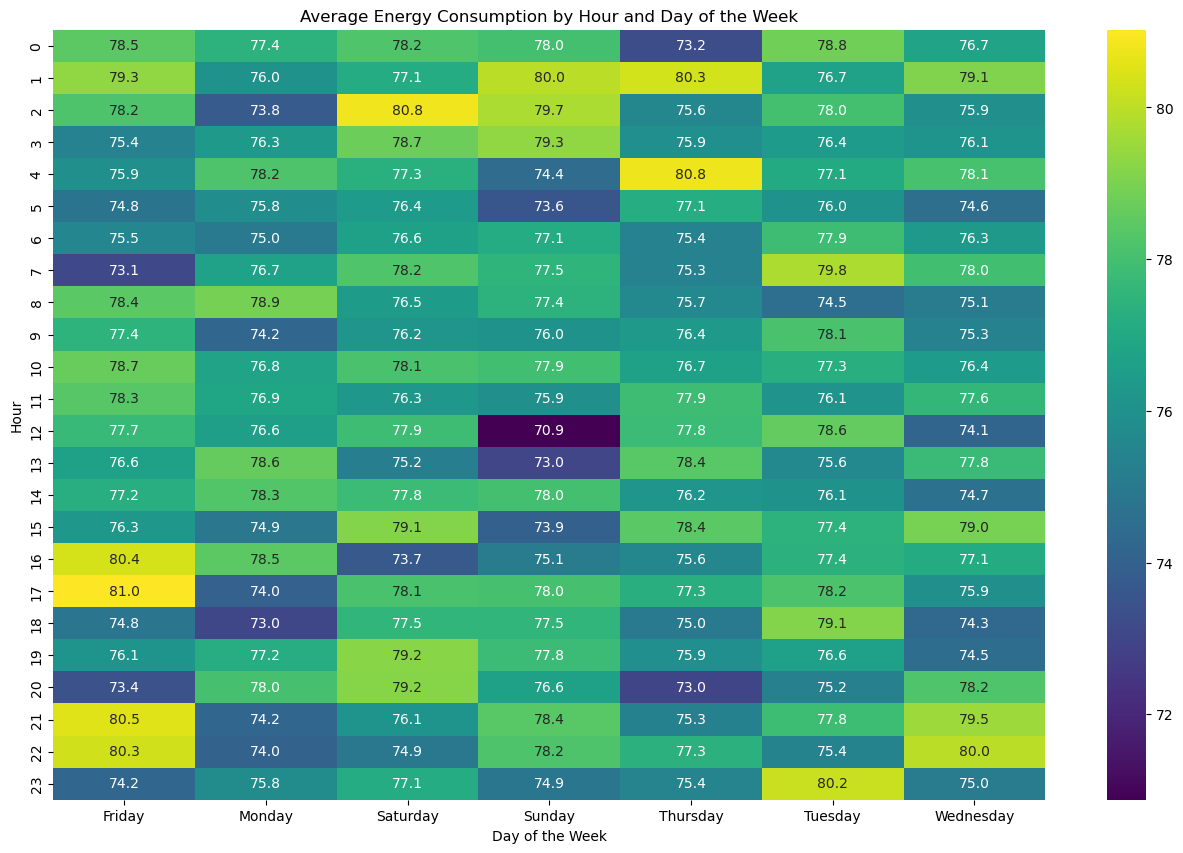

In [13]:
# Assuming 'Hour', 'Day_of_Week', and 'Energy_Consumption' columns exist
if 'Hour' in data.columns and 'DayOfWeek' in data.columns and 'EnergyConsumption' in data.columns:
    heatmap_data = data.groupby(['Hour', 'DayOfWeek'])['EnergyConsumption'].mean().unstack()

    # Plot heatmap
    plt.figure(figsize=(16, 10))
    sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='viridis')
    plt.title('Average Energy Consumption by Hour and Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Hour')
    plt.show()

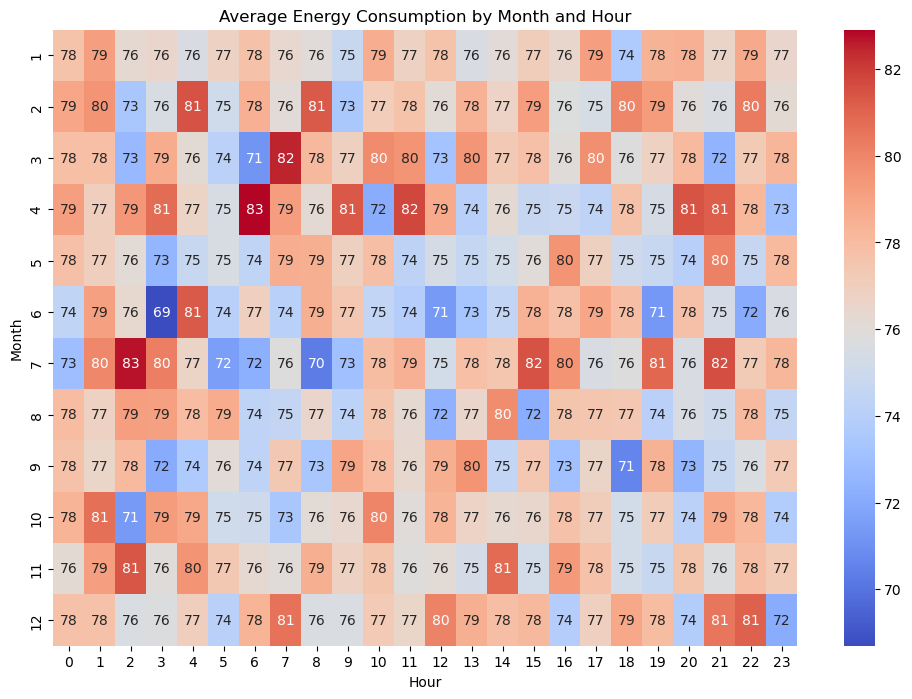

In [14]:
# Assuming 'Month', 'Hour', and 'Energy_Consumption' columns exist
if 'Month' in data.columns and 'Hour' in data.columns and 'EnergyConsumption' in data.columns:
    heatmap_data = data.groupby(['Month', 'Hour'])['EnergyConsumption'].mean().unstack()

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
    plt.title('Average Energy Consumption by Month and Hour')
    plt.xlabel('Hour')
    plt.ylabel('Month')
    plt.show()

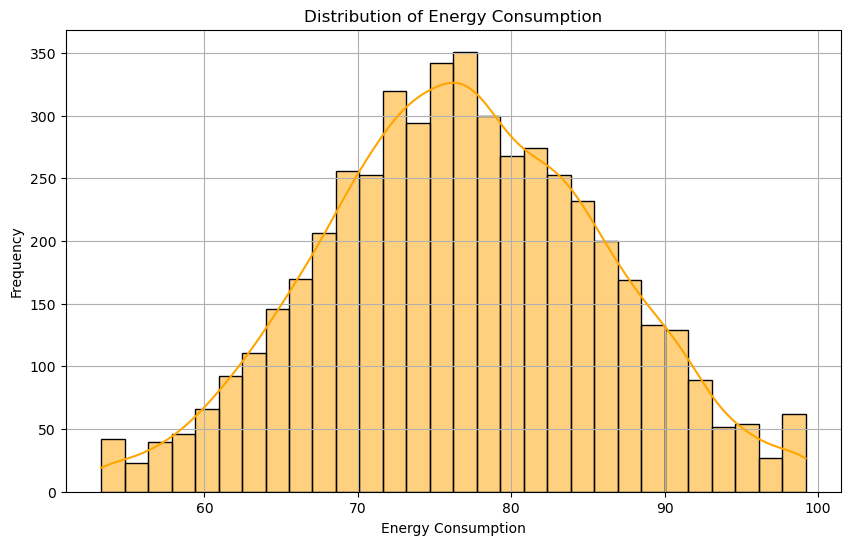

In [15]:
# Plot distribution of energy consumption
if 'EnergyConsumption' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['EnergyConsumption'], kde=True, color='orange', bins=30)
    plt.title('Distribution of Energy Consumption')
    plt.xlabel('Energy Consumption')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

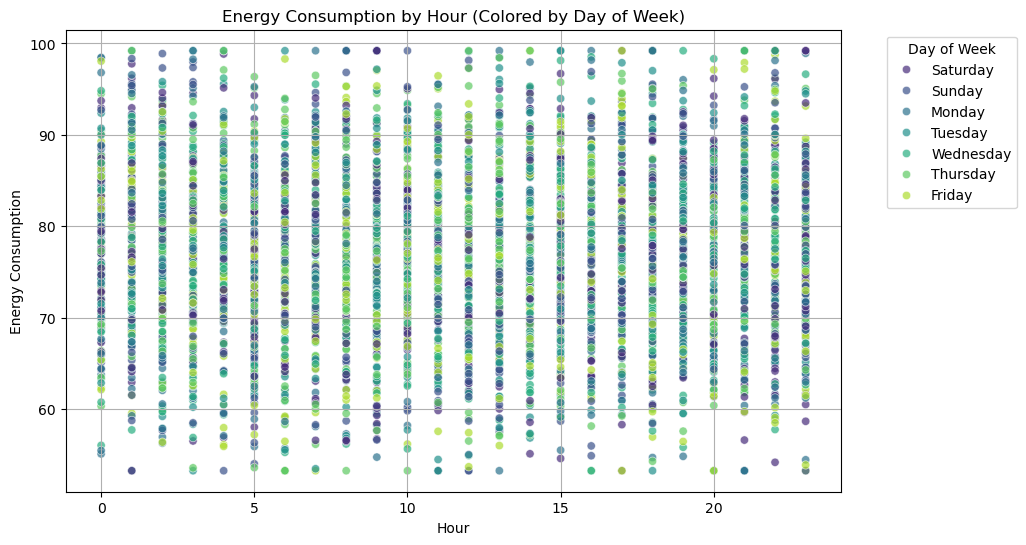

In [16]:
# Scatter plot for Energy Consumption by Hour
if 'Hour' in data.columns and 'EnergyConsumption' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Hour', y='EnergyConsumption', hue='DayOfWeek', palette='viridis', alpha=0.7)
    plt.title('Energy Consumption by Hour (Colored by Day of Week)')
    plt.xlabel('Hour')
    plt.ylabel('Energy Consumption')
    plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_25848\3213576047.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='DayOfWeek', y='EnergyConsumption', palette='coolwarm')


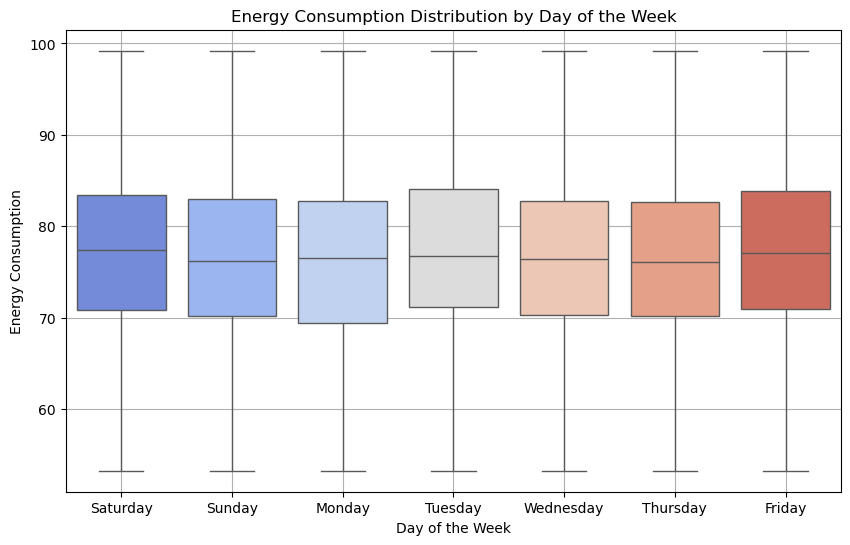

In [17]:
# Boxplot for Energy Consumption by Day of the Week
if 'DayOfWeek' in data.columns and 'EnergyConsumption' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='DayOfWeek', y='EnergyConsumption', palette='coolwarm')
    plt.title('Energy Consumption Distribution by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Energy Consumption')
    plt.grid()
    plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_25848\1770164024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Hour', y='EnergyConsumption', palette='viridis', scale='width')
C:\Users\dell\AppData\Local\Temp\ipykernel_25848\1770164024.py:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=data, x='Hour', y='EnergyConsumption', palette='viridis', scale='width')


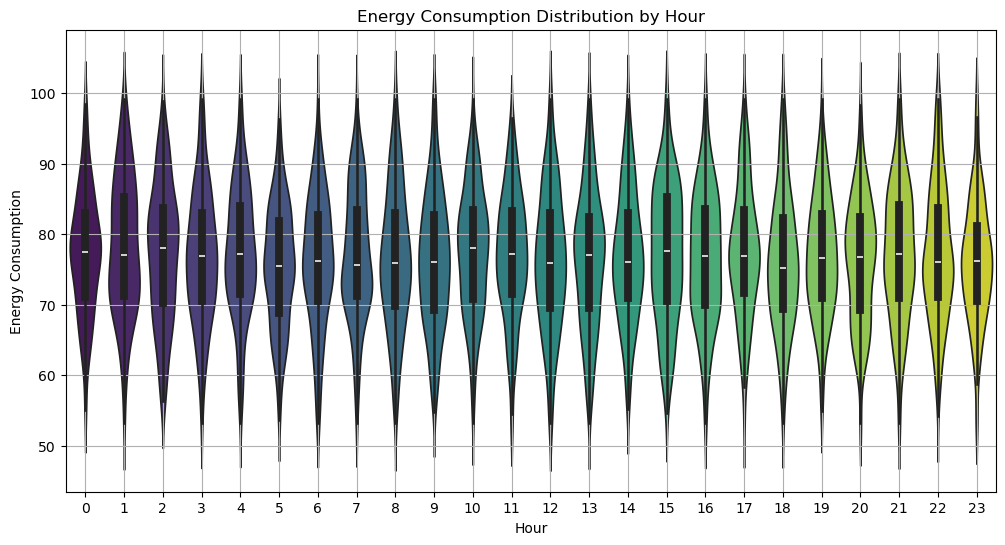

In [18]:
# Violin plot for Energy Consumption by Hour
if 'Hour' in data.columns and 'EnergyConsumption' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=data, x='Hour', y='EnergyConsumption', palette='viridis', scale='width')
    plt.title('Energy Consumption Distribution by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Energy Consumption')
    plt.grid()
    plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable

<Figure size 1200x800 with 0 Axes>

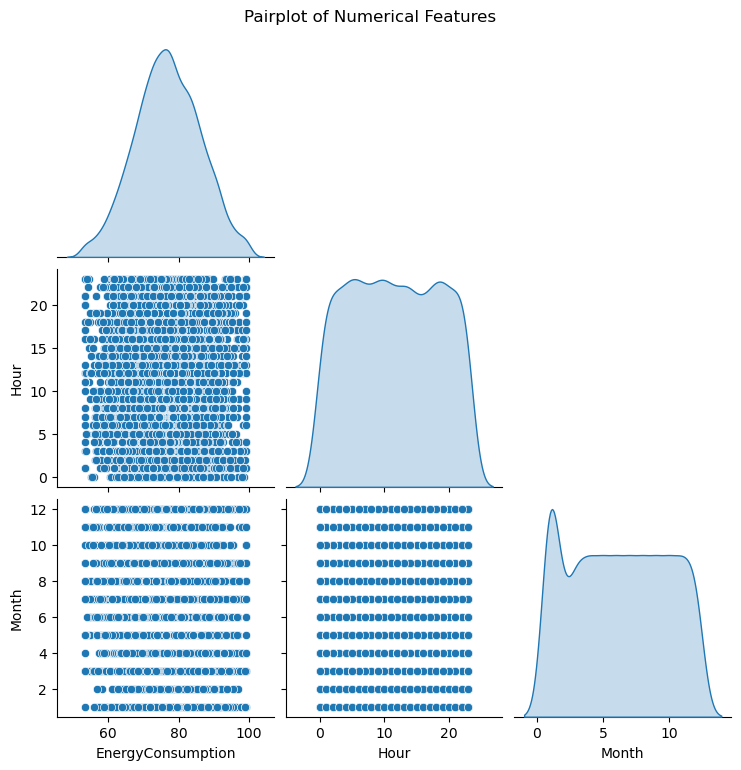

In [19]:
# Pairplot for numerical features
numerical_columns = ['EnergyConsumption', 'Hour', 'Month', 'DayOfWeek']
numerical_data = data[numerical_columns]

plt.figure(figsize=(12, 8))
sns.pairplot(numerical_data, diag_kind='kde', corner=True, palette='viridis')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

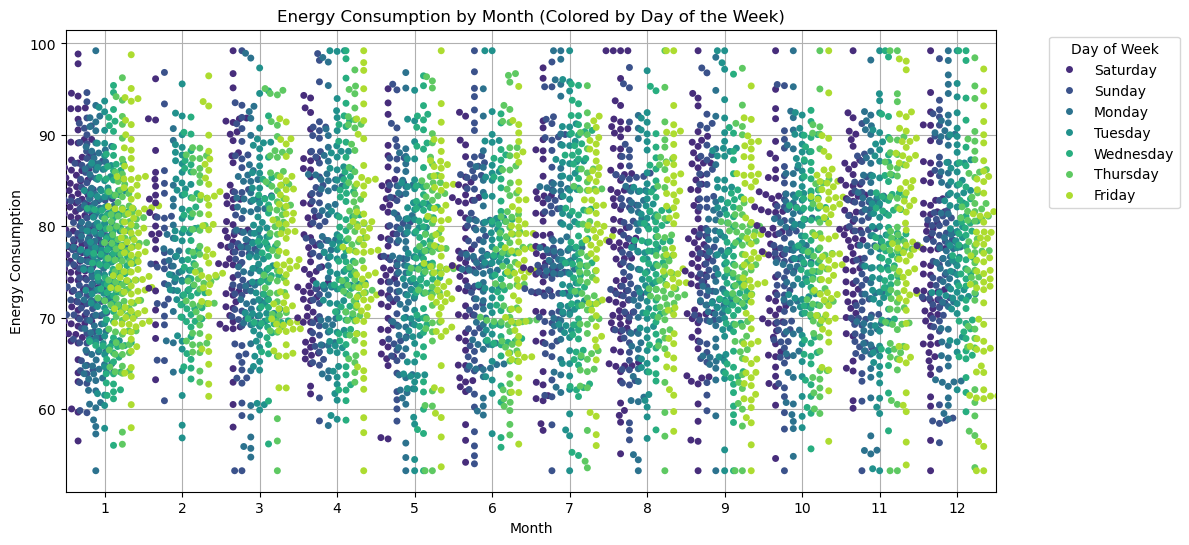

In [20]:
# Swarm plot for Energy Consumption by Month
if 'Month' in data.columns and 'EnergyConsumption' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.swarmplot(data=data, x='Month', y='EnergyConsumption', hue='DayOfWeek', palette='viridis', dodge=True)
    plt.title('Energy Consumption by Month (Colored by Day of the Week)')
    plt.xlabel('Month')
    plt.ylabel('Energy Consumption')
    plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_25848\938440199.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data['EnergyConsumption'], shade=True, color='blue')


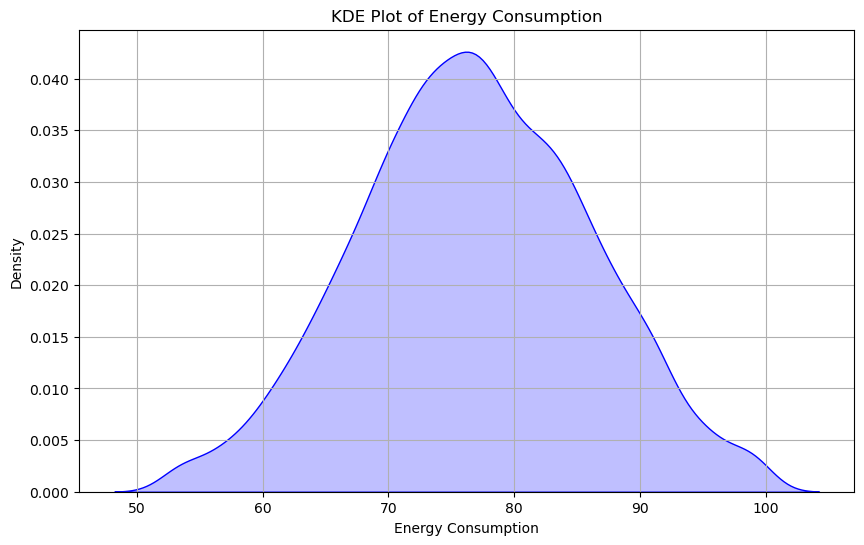

In [21]:
# KDE Plot for Energy Consumption
if 'EnergyConsumption' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data['EnergyConsumption'], shade=True, color='blue')
    plt.title('KDE Plot of Energy Consumption')
    plt.xlabel('Energy Consumption')
    plt.ylabel('Density')
    plt.grid()
    plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_25848\300285041.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_total.index, y=monthly_total.values, palette='viridis')


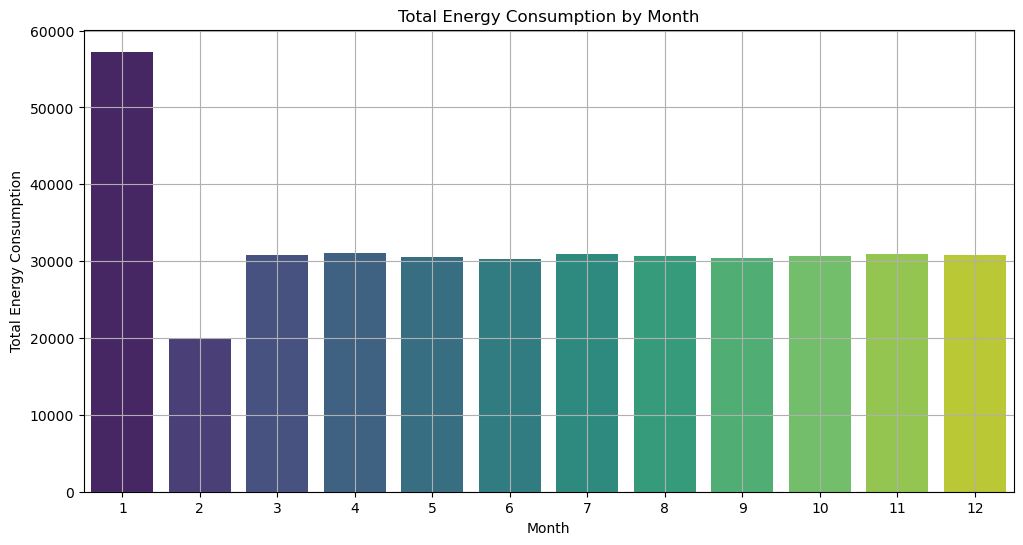

In [22]:
# Total Energy Consumption by Month
if 'Month' in data.columns and 'EnergyConsumption' in data.columns:
    monthly_total = data.groupby('Month')['EnergyConsumption'].sum()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=monthly_total.index, y=monthly_total.values, palette='viridis')
    plt.title('Total Energy Consumption by Month')
    plt.xlabel('Month')
    plt.ylabel('Total Energy Consumption')
    plt.grid()
    plt.show()

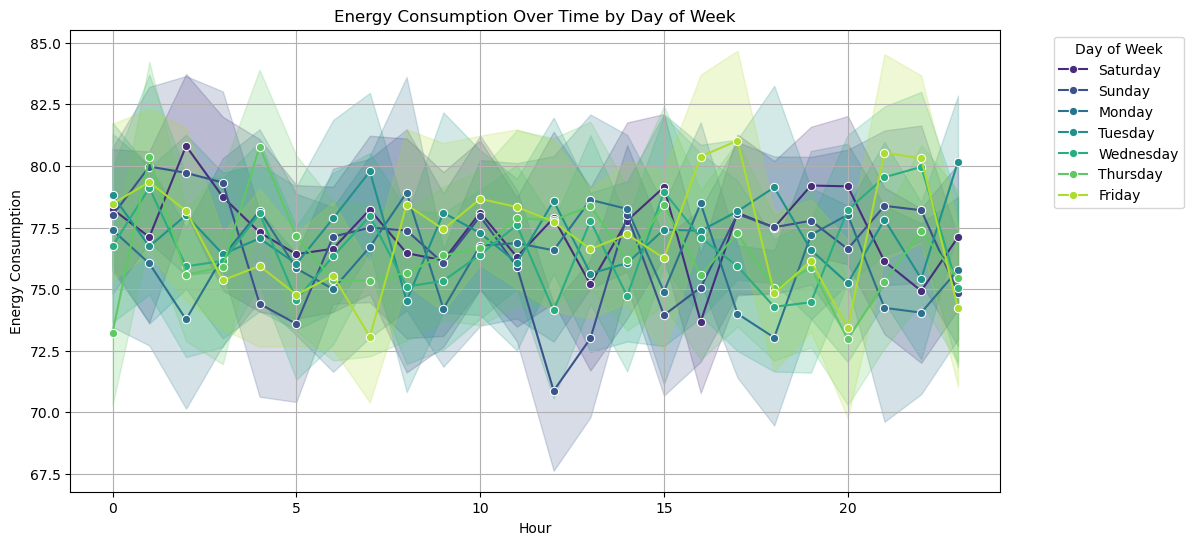

In [23]:
# Line Plot for Energy Consumption Over Time by Day of Week
if 'DayOfWeek' in data.columns and 'Hour' in data.columns and 'EnergyConsumption' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x='Hour', y='EnergyConsumption', hue='DayOfWeek', palette='viridis', marker='o')
    plt.title('Energy Consumption Over Time by Day of Week')
    plt.xlabel('Hour')
    plt.ylabel('Energy Consumption')
    plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

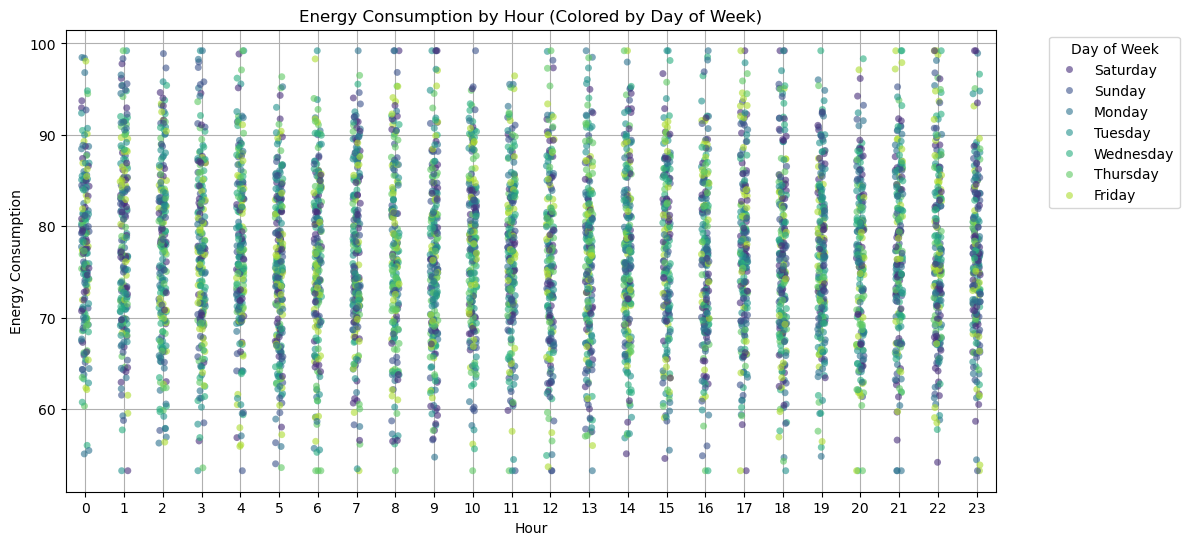

In [24]:
# Strip Plot for Energy Consumption by Hour
if 'Hour' in data.columns and 'EnergyConsumption' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.stripplot(data=data, x='Hour', y='EnergyConsumption', hue='DayOfWeek', palette='viridis', alpha=0.6)
    plt.title('Energy Consumption by Hour (Colored by Day of Week)')
    plt.xlabel('Hour')
    plt.ylabel('Energy Consumption')
    plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

In [25]:
# Encode categorical columns
categorical_columns = ['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage']
label_encoders = {}

In [26]:
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [27]:
# Define features (X) and target (y)
X = data.drop(columns=['EnergyConsumption'])  # Features
y = data['EnergyConsumption']  # Target

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 11)
(4000,)
(1000, 11)
(1000,)


In [29]:
# Scale numerical features
numerical_columns = ['Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'Month', 'Hour', 'Occupancy']
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [30]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
# Make predictions
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [33]:
print("\nModel Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Performance:
Root Mean Squared Error (RMSE): 7.96
R-squared (R²): 0.24


In [34]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

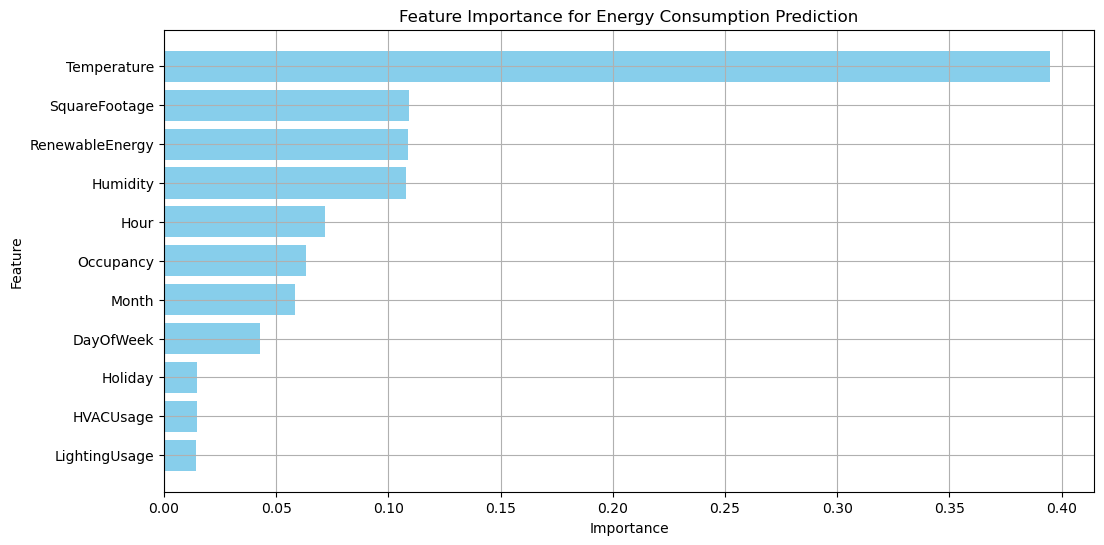

In [35]:
# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Feature Importance for Energy Consumption Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

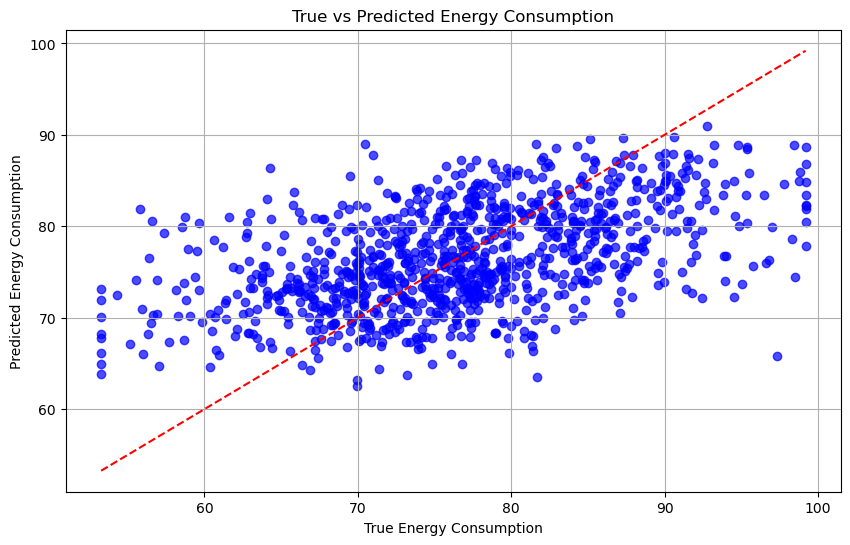

In [36]:
# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('True vs Predicted Energy Consumption')
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.grid()
plt.show()